## Analyse Titanic - Data Science

### Exploratory Data Analysis

#### Objectif

- Prédire si un passager a survécu ou non au naufrage du Titanic

#### Critère de succès (métrique principale)
**Accuracy :** $ \ge $ 83 - 85 % (faire mieux que gender_submission ~ 76.5%)

**Métriques secondaires :**
    - 
| Métrique               | Seuil minimum à viser        |
|------------------------|------------------------------|
| **Précision**          |  $\ge 80$%                   |
| **Recall**          |  $\ge 80$%                   |
| **F1-score**          |  $\ge 0.8$                   |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)

L'acquisition des datasets s'est fait sur:  
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

# Combine datasets together to run certain operations 
all_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [4]:
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Identification de la target

In [5]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
train_df["Survived"].value_counts(normalize=True).values * 100

array([61.61616162, 38.38383838])

In [7]:
# Dimensions du dataset
print(train_df.shape)
print(all_df.shape)

(891, 12)
(1309, 12)


In [8]:
# Types
train_df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: ylabel='count'>

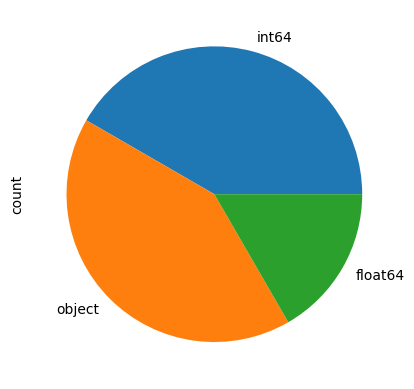

In [9]:
train_df.dtypes.value_counts().plot.pie()

##### Détection des valeurs manquantes

In [10]:
# Pourcentage de valeurs manquantes pour chaque colonne 
(train_df.isnull().sum() / train_df.shape[0]).round(3).sort_values(ascending=False) * 100

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
dtype: float64

In [11]:
import missingno as msno

<Axes: >

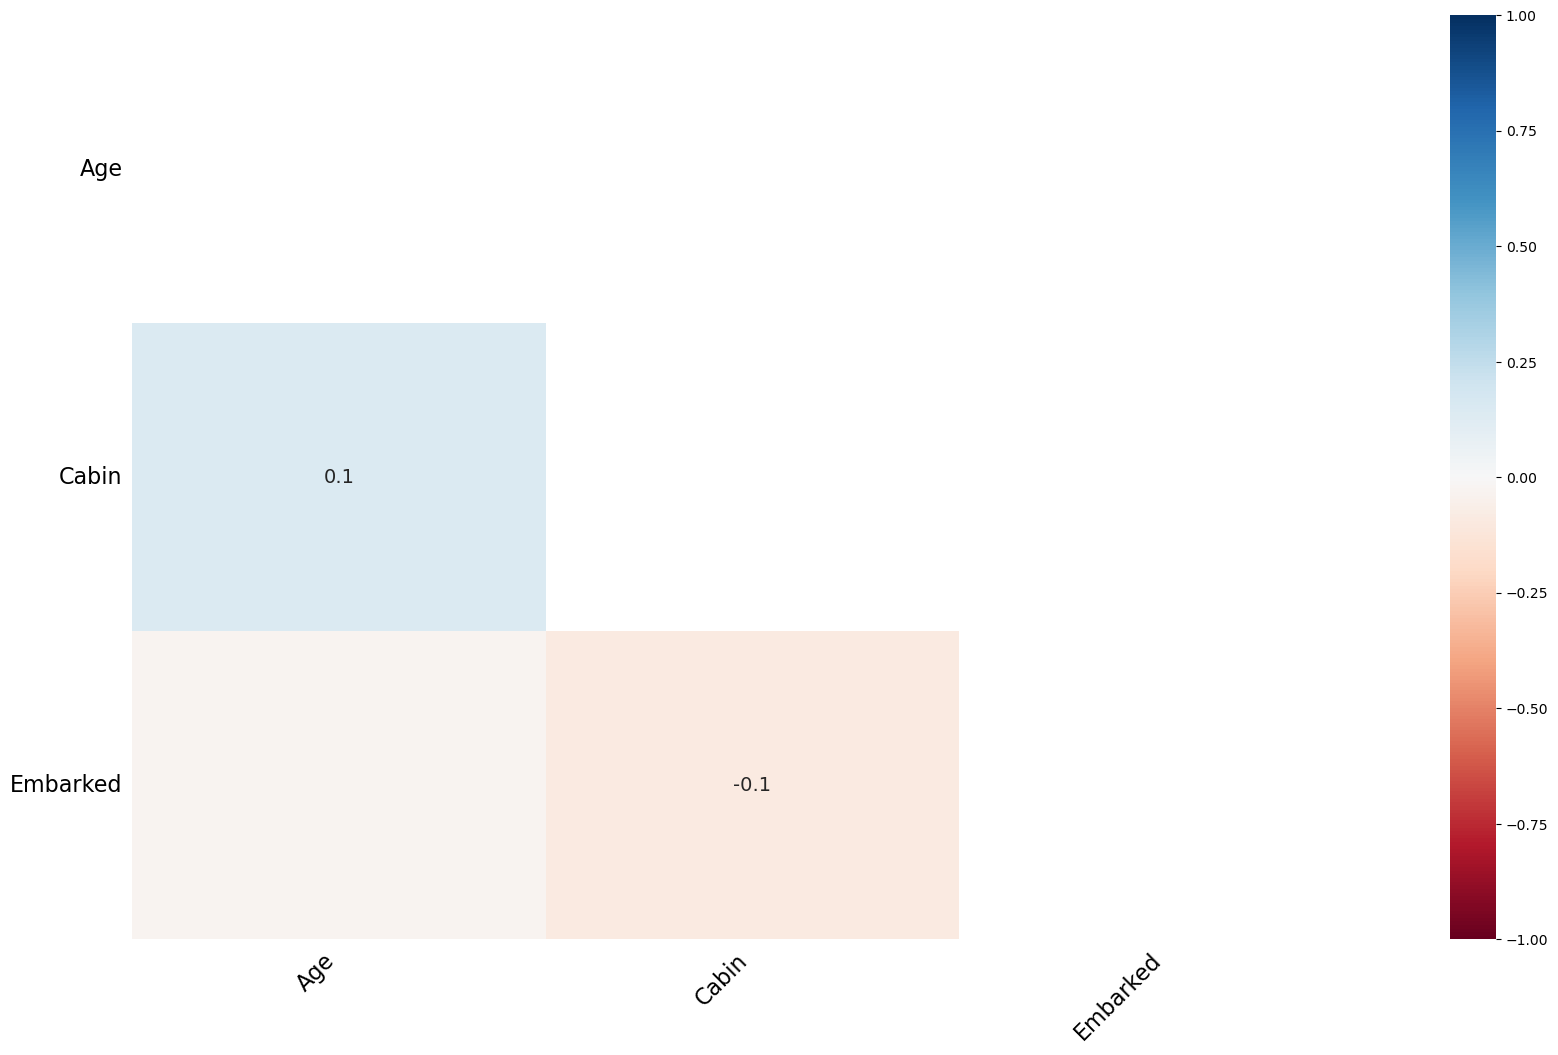

In [12]:
msno.heatmap(train_df)

<Axes: >

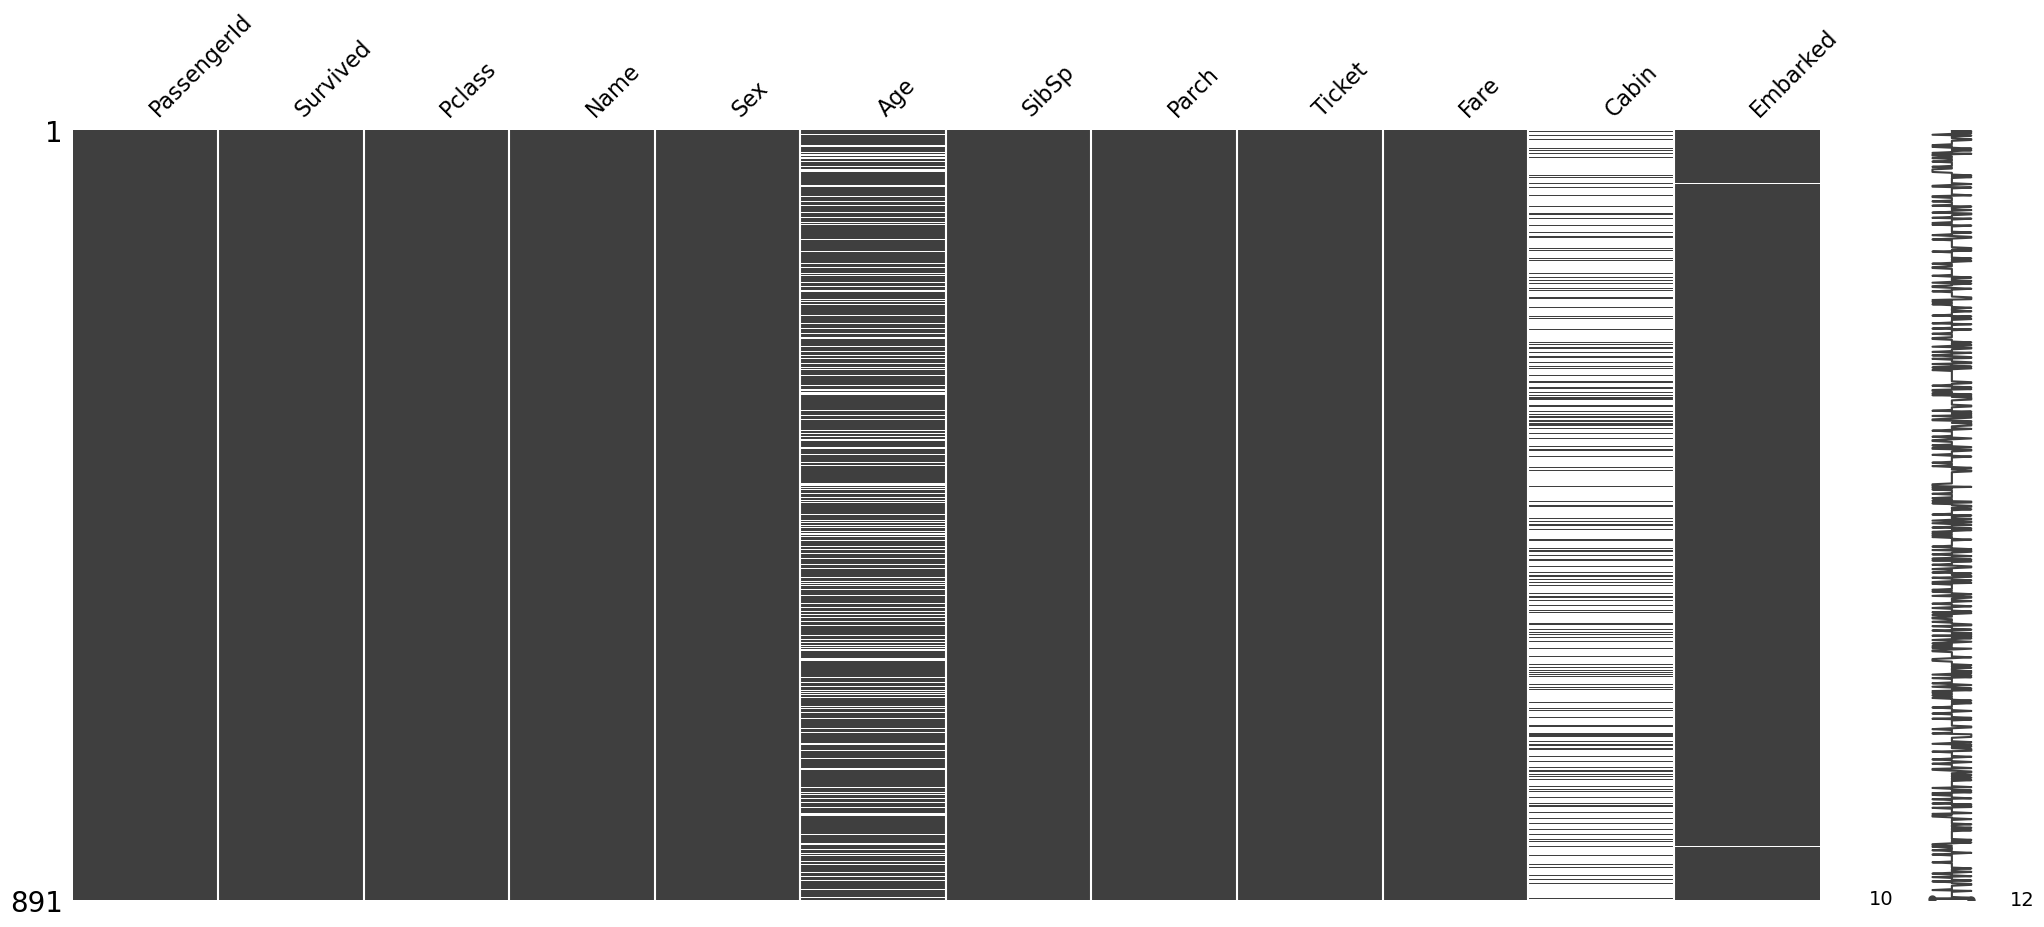

In [13]:
msno.matrix(train_df)

##### Duplicats

In [14]:
train_df.duplicated().sum()

0

#### Analyse de fond

##### Signification des variables

| Nom de la colonne | Type                        | Description                                                                                                                             |
| ----------------- | --------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **PassengerId**   | Numérique (int)             | Identifiant unique du passager. Ne contient pas d'information utile pour la prédiction.                                                 |
| **Survived**      | Binaire (0 ou 1)            | Variable cible. 0 = mort, 1 = survécu.                                                                                                  |
| **Pclass**        | Catégorielle (1, 2, 3)      | Classe du billet : 1 = première, 2 = deuxième, 3 = troisième. Proxy du statut socio-économique.                                         |
| **Name**          | Texte                       | Nom complet du passager. Peut contenir des titres (Mr, Mrs, Miss...) utiles pour extraire des informations.                             |
| **Sex**           | Catégorielle (male, female) | Sexe du passager. Très corrélé avec la survie (femmes ont survécu en plus grand nombre).                                                |
| **Age**           | Numérique (float)           | Âge du passager. Contient des valeurs manquantes. Important pour évaluer la vulnérabilité.                                              |
| **SibSp**         | Numérique (int)             | Nombre de frères/sœurs ou conjoints à bord. Utilisé pour déterminer si la personne voyageait en famille.                                |
| **Parch**         | Numérique (int)             | Nombre de parents ou enfants à bord. Combine avec SibSp pour inférer la taille de la famille.                                           |
| **Ticket**        | Texte                       | Numéro du billet. Souvent non standardisé, peu utile sans gros nettoyage.                                                               |
| **Fare**          | Numérique (float)           | Prix du billet. Peut être un indicateur du statut économique. Corrélé à Pclass.                                                         |
| **Cabin**         | Texte                       | Numéro de cabine. Beaucoup de valeurs manquantes. Peut contenir l’information sur la localisation sur le bateau.                        |
| **Embarked**      | Catégorielle (C, Q, S)      | Port d’embarquement : C = Cherbourg, Q = Queenstown, S = Southampton. Peut refléter des différences socio-économiques ou géographiques. |


##### Analyse des valeurs numériques

In [15]:
continuous_var = ['Age', 'Fare']
discrete_var = ['SibSp', 'Parch']
categorial_var = ['Pclass', 'Sex']

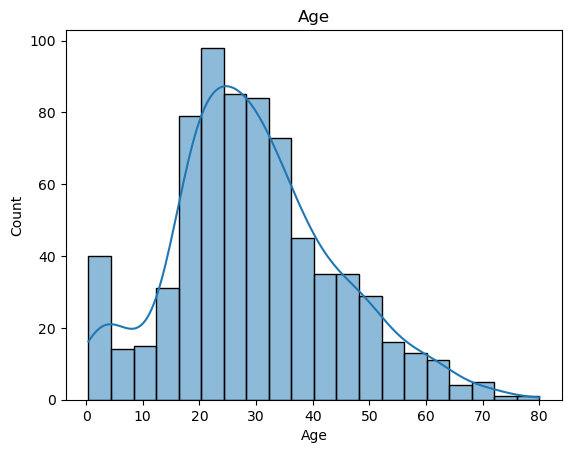

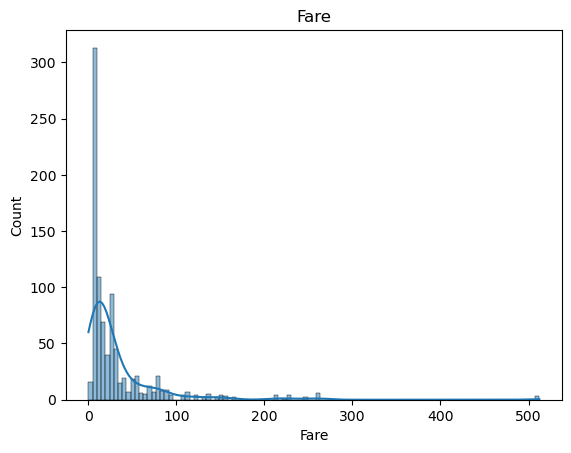

In [16]:
for col in continuous_var:
    plt.figure()
    sns.histplot(train_df[col], kde=True)
    plt.title(col)
    plt.show()

In [17]:
train_df[continuous_var]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [18]:
# Stats
train_df[continuous_var].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<Axes: ylabel='Age'>

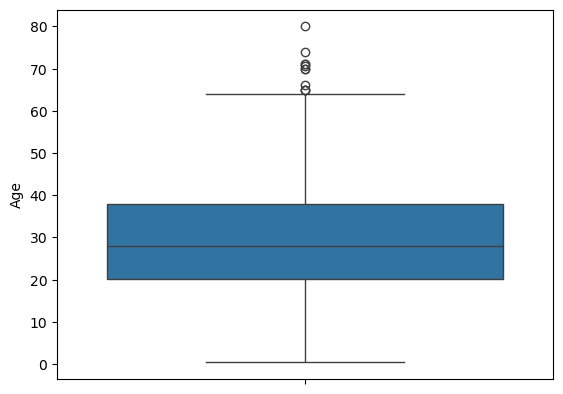

In [19]:
sns.boxplot(train_df['Age'])

In [20]:
train_df[train_df['Fare'] == 0].shape

(15, 12)

<Axes: ylabel='Fare'>

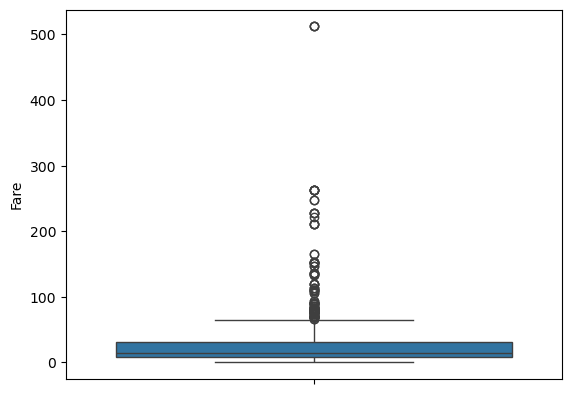

In [21]:
sns.boxplot(train_df['Fare'])

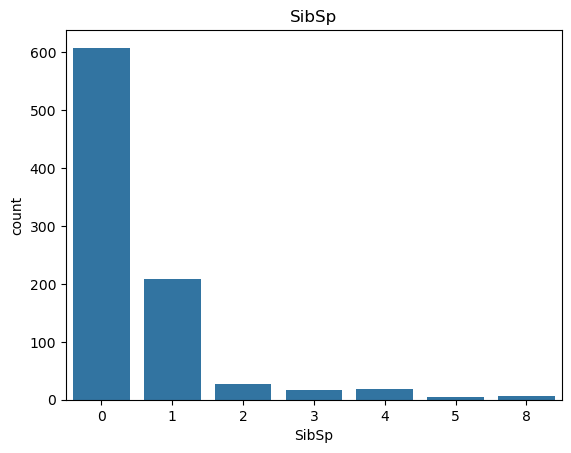

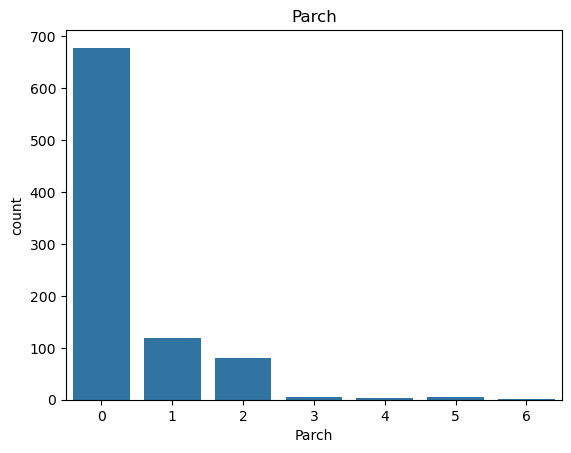

In [22]:
# Analyse des variables discrètes
for col in discrete_var:
    plt.figure()
    sns.countplot(x=col, data=train_df)
    plt.title(col)
    plt.show()

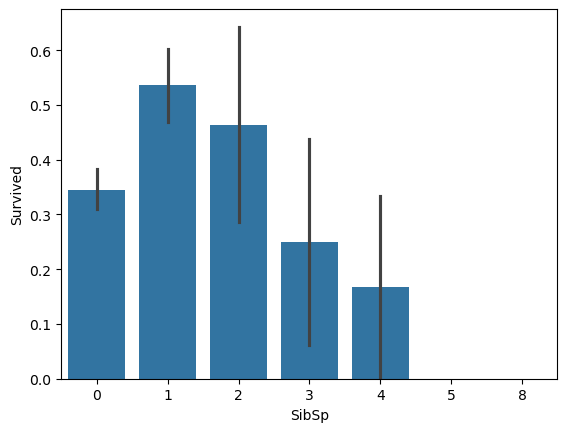

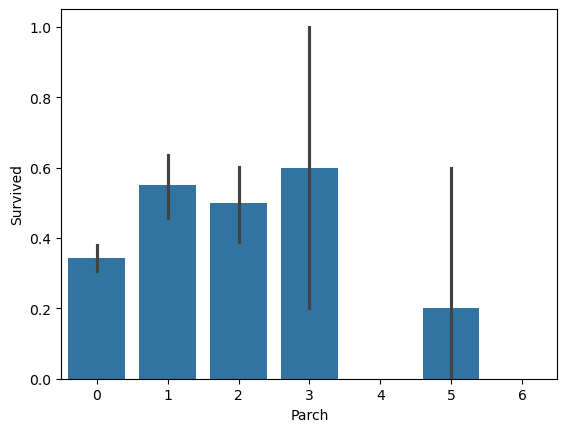

In [23]:
for col in discrete_var:
    plt.figure()
    sns.barplot(x=col, y="Survived", data=train_df)
    plt.show()

In [24]:
train_df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
train_df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

##### Création de variables dérivées utiles

In [26]:
# Taille de famille
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1 # +1 including the passenger
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


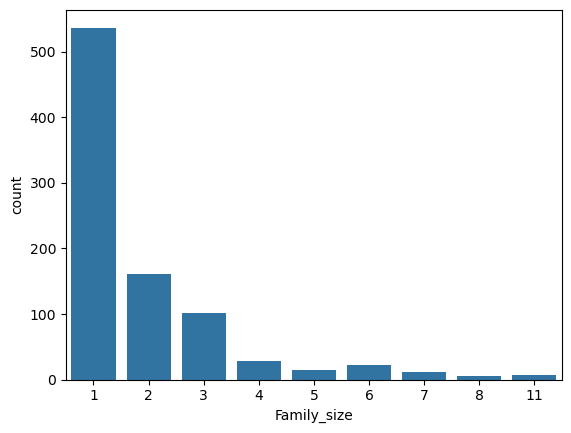

In [27]:
plt.figure()
sns.countplot(x='Family_size', data=train_df)
plt.show()

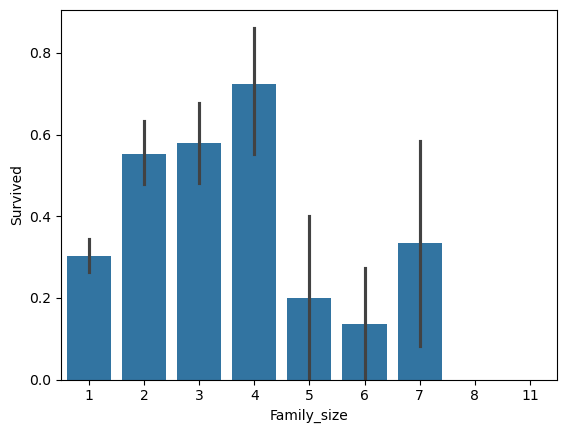

In [28]:
plt.figure()
sns.barplot(x='Family_size', y='Survived', data=train_df)
plt.show()

In [29]:
# Crétion de la variable is_alone
train_df['Is_alone'] = (train_df['Family_size'] == 1).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


<Axes: xlabel='Is_alone', ylabel='Survived'>

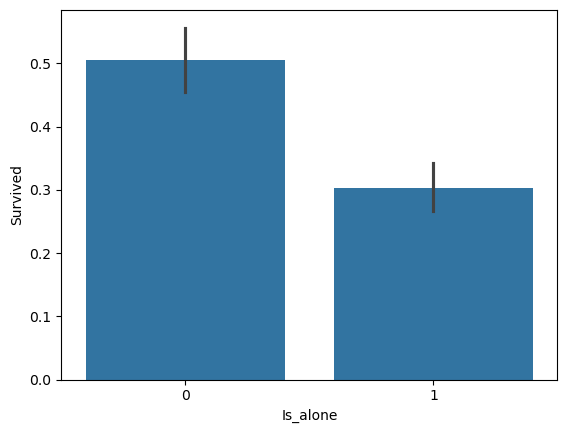

In [30]:
sns.barplot(x='Is_alone', y='Survived', data=train_df)

Is_alone
1    537
0    354
Name: count, dtype: int64


<Axes: xlabel='Is_alone', ylabel='count'>

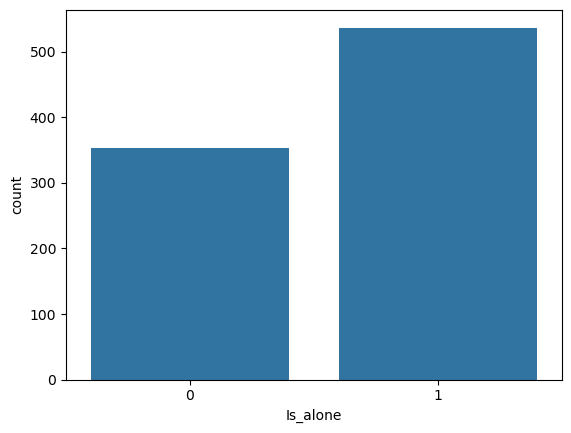

In [31]:
print(train_df['Is_alone'].value_counts())
sns.countplot(x='Is_alone', data=train_df)

##### Analyse des variables catégorielles

In [32]:
# Analyse de la variable Sex
display(train_df['Sex'].value_counts(normalize=True))
display(train_df['Sex'].value_counts())

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Sex
male      577
female    314
Name: count, dtype: int64

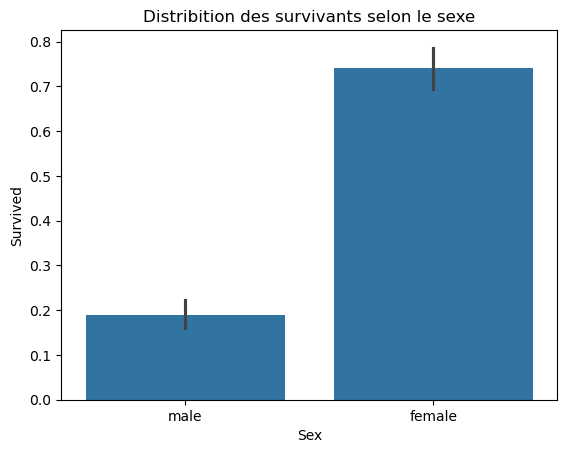

In [33]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Distribition des survivants selon le sexe")
plt.show()

In [34]:
# Tableau croisé
pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [35]:
train_df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [36]:
display(train_df['Pclass'].value_counts())
display(train_df['Pclass'].value_counts(normalize=True) * 100)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

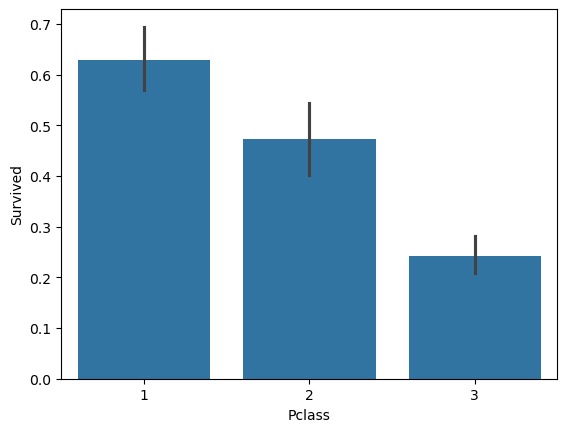

In [37]:
# Visualisation
plt.figure() 
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

In [38]:
train_df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [39]:
(pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index') * 100).round(2)

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


In [40]:
train_df['Cabin'].sample(5)

514    NaN
485    NaN
849    C92
754    NaN
785    NaN
Name: Cabin, dtype: object

**Analyse de la variabele « Cabin »**

La première lettre correspond au pont 


In [41]:
# Extraction de la première lettre
train_df["Cabin_letter"] = train_df["Cabin"].str[0]

In [42]:
# Visualisation
train_df["Cabin_letter"].value_counts()

Cabin_letter
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition des passagers selon leurs cabines(sans les NaN)')

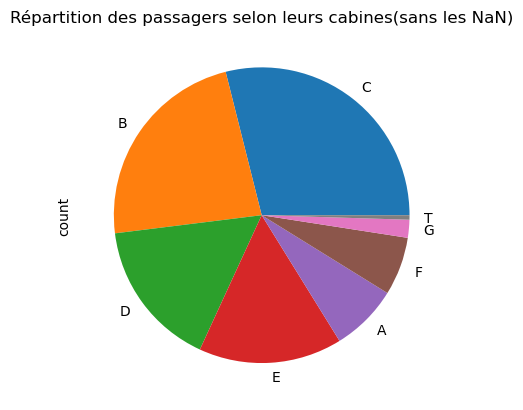

In [43]:
train_df["Cabin_letter"].value_counts().plot.pie()
plt.title("Répartition des passagers selon leurs cabines(sans les NaN)")

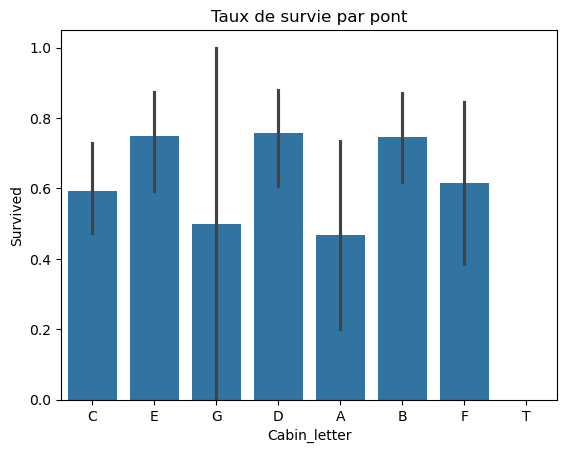

In [44]:
sns.barplot(x='Cabin_letter', y="Survived", data=train_df)
plt.title("Taux de survie par pont")
plt.show()

In [45]:
# Création d'une nouvelle variable "Has_cabin"
train_df["Has_cabin"] = train_df["Cabin"].notnull().astype(int)

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Cabin_letter,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,NaN,0


In [47]:
train_df["Has_cabin"].value_counts()

Has_cabin
0    687
1    204
Name: count, dtype: int64

In [48]:
train_df.groupby("Has_cabin")["Survived"].mean() * 100

Has_cabin
0    29.985444
1    66.666667
Name: Survived, dtype: float64

In [49]:
# Analyse de Embarked
train_df["Embarked"].value_counts(normalize=True) * 100

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

<Axes: xlabel='Embarked', ylabel='Count'>

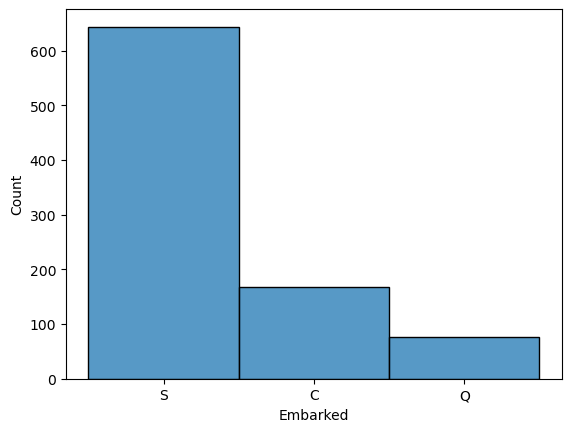

In [50]:
sns.histplot(train_df["Embarked"])

In [51]:
train_df.groupby("Embarked")["Survived"].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

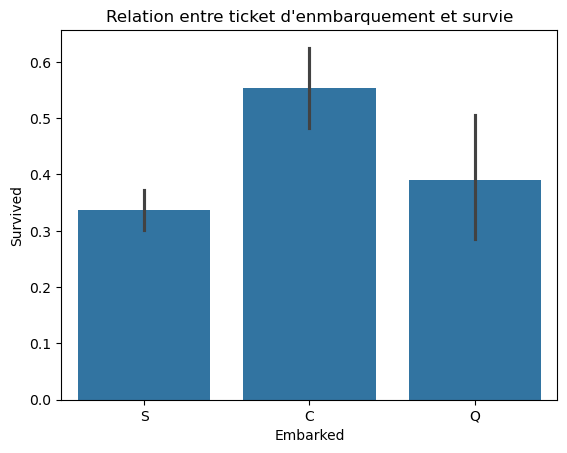

In [52]:
sns.barplot(x="Embarked", y="Survived", data=train_df)
plt.title("Relation entre ticket d'enmbarquement et survie")
plt.show()

#### Corrélation features vs target

##### Corrélation Age / Survived

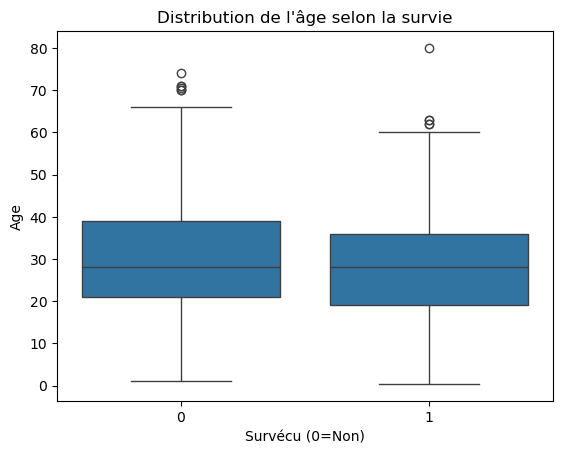

In [53]:
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Distribution de l'âge selon la survie")
plt.xlabel("Survécu (0=Non)")
plt.ylabel("Age")
plt.show()

In [54]:
train_df[train_df["Age"] < 10].shape

(62, 16)

In [55]:
display(train_df[['Age', 'Survived']].corr())

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


Regardons la moyenne par tranche d'âge

In [56]:
train_df["Age_group"] = pd.cut(train_df["Age"], bins=[0, 12, 18, 40, 60, 100], labels=["Enfant", "Adolescent", "Adulte", "Moyen âge", "Vieux"])
print(train_df.groupby("Age_group")["Survived"].mean() * 100)

Age_group
Enfant        57.971014
Adolescent    42.857143
Adulte        38.823529
Moyen âge     39.062500
Vieux         22.727273
Name: Survived, dtype: float64


/tmp/ipykernel_16986/4124867109.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby("Age_group")["Survived"].mean() * 100)


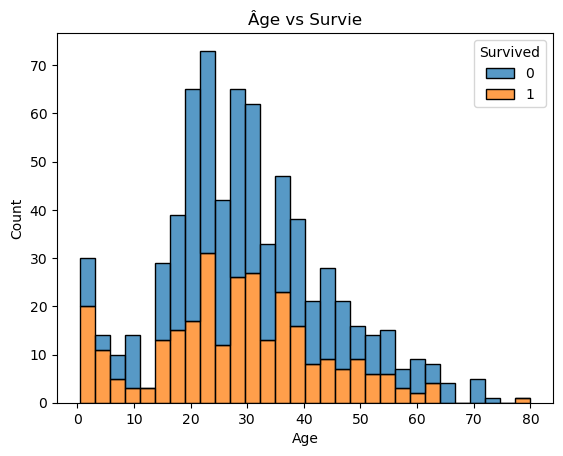

In [57]:

sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=False, multiple='stack')
plt.title("Âge vs Survie")
plt.show()

<Axes: xlabel='Age_group', ylabel='Survived'>

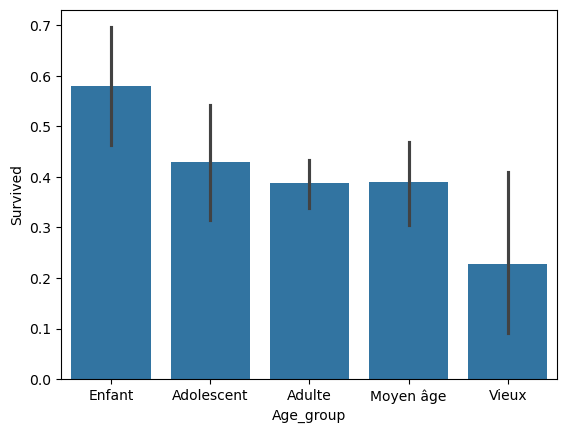

In [58]:
sns.barplot(data=train_df, x='Age_group', y='Survived')

##### Survived vs Fare

<Axes: xlabel='Fare', ylabel='Count'>

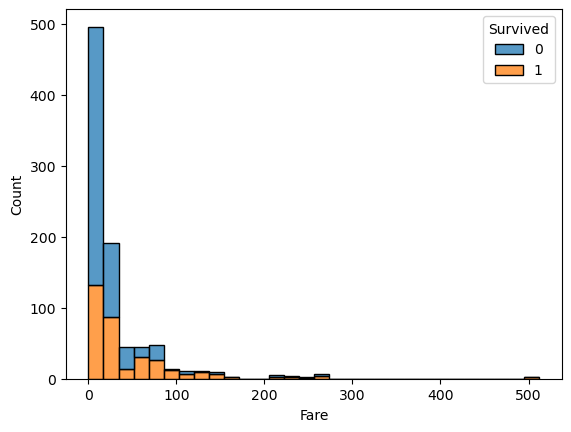

In [59]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, multiple="stack")

<Axes: xlabel='Survived', ylabel='Fare'>

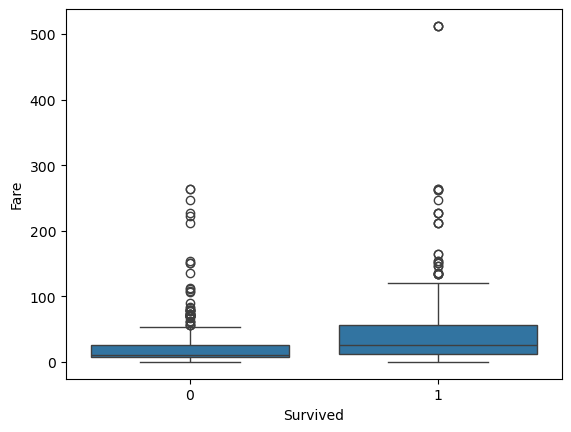

In [60]:
sns.boxplot(data=train_df, x='Survived', y='Fare')

<Axes: xlabel='Fare_bin', ylabel='Survived'>

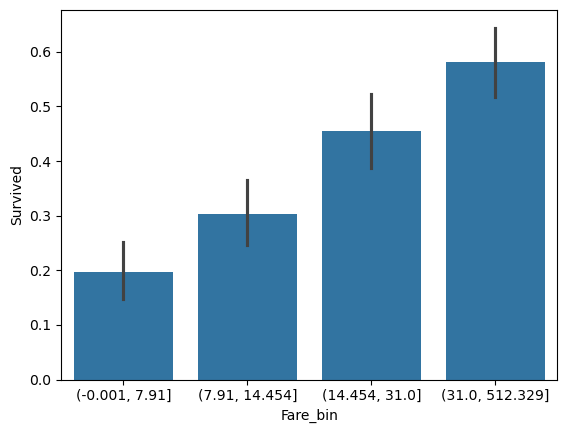

In [61]:
# sns.barplot(data=train_df, x='Fare', y='Survived')
train_df["Fare_bin"] = pd.qcut(train_df['Fare'], q=4)
sns.barplot(data=train_df, x='Fare_bin', y='Survived')

In [62]:
train_df['Fare_bin']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare_bin, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [63]:
train_df.groupby('Fare_bin')['Survived'].mean() * 100

/tmp/ipykernel_16986/2971811130.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('Fare_bin')['Survived'].mean() * 100


Fare_bin
(-0.001, 7.91]     19.730942
(7.91, 14.454]     30.357143
(14.454, 31.0]     45.495495
(31.0, 512.329]    58.108108
Name: Survived, dtype: float64

#### Corrélation inter-features

In [64]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df_num = train_df[num_cols]

In [65]:
train_df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Is_alone,Has_cabin
0,1,0,3,22.0,1,0,7.2500,2,0,0
1,2,1,1,38.0,1,0,71.2833,2,0,1
2,3,1,3,26.0,0,0,7.9250,1,1,0
3,4,1,1,35.0,1,0,53.1000,2,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0


In [66]:
corr_matrix = train_df_num.corr()

<Axes: >

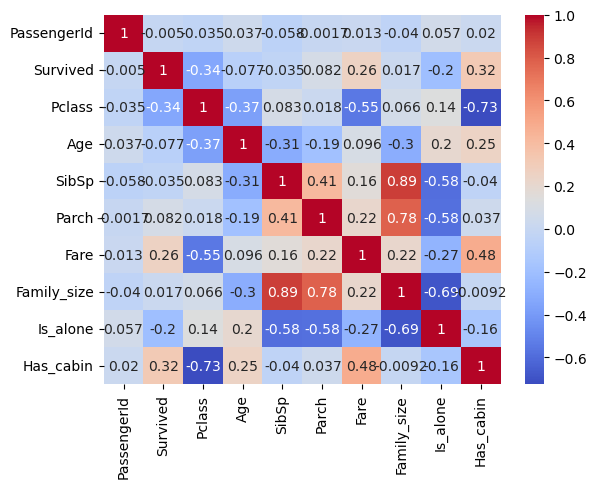

In [67]:
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [68]:
threshold = 0.6
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = abs(corr_matrix.iloc[i, j]).round(2)
        if corr_value > threshold:
            corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_value))


In [69]:
display(corr_pairs)

[('Family_size', 'SibSp', 0.89),
 ('Family_size', 'Parch', 0.78),
 ('Is_alone', 'Family_size', 0.69),
 ('Has_cabin', 'Pclass', 0.73)]

#### Identification d'outliers

##### Outliers pour Age

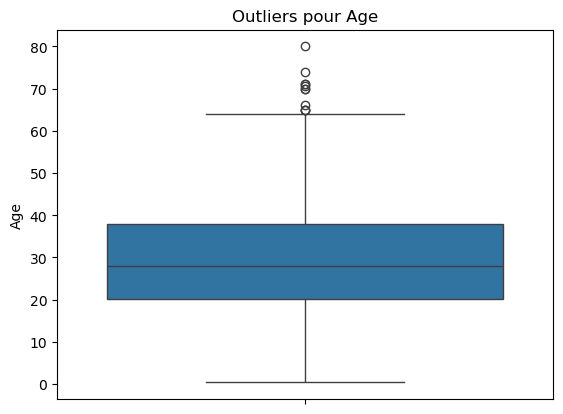

In [70]:
plt.figure()
sns.boxplot(train_df['Age'])
plt.title("Outliers pour Age")
plt.show()

In [71]:
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1

b_inf = Q1 - 1.5 * IQR
b_sup = Q3 + 1.5 * IQR

outliers = train_df[(train_df['Age'] < b_inf) | (train_df['Age'] > b_sup)]


In [72]:
outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Cabin_letter,Has_cabin,Age_group,Fare_bin
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,1,1,NaN,0,Vieux,"(7.91, 14.454]"
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,2,0,B,1,Vieux,"(31.0, 512.329]"
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1,1,A,1,Vieux,"(31.0, 512.329]"
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1,1,NaN,0,Vieux,"(-0.001, 7.91]"
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,1,1,NaN,0,Vieux,"(-0.001, 7.91]"


In [73]:
outliers.shape

(11, 18)

##### Outliers pour Fare

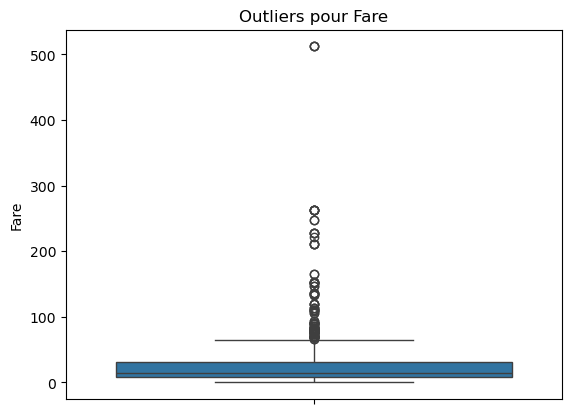

In [74]:
plt.figure()
sns.boxplot(train_df['Fare'])
plt.title("Outliers pour Fare")
plt.show()

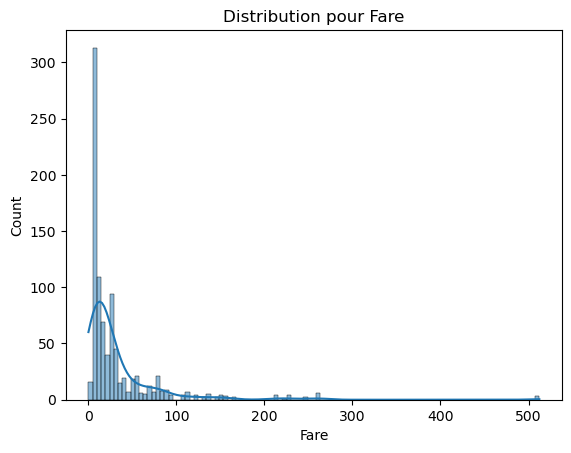

In [75]:
plt.figure()
sns.histplot(train_df['Fare'], kde=True)
plt.title("Distribution pour Fare")
plt.show()

In [76]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

b_inf = Q1 - 1.5 * IQR
b_sup = Q3 + 1.5 * IQR

outliers = train_df[(train_df['Fare'] < b_inf) | (train_df['Fare'] > b_sup)]

In [77]:
outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Cabin_letter,Has_cabin,Age_group,Fare_bin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,C,1,Adulte,"(31.0, 512.329]"
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,0,C,1,Adulte,"(31.0, 512.329]"
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,2,0,B,1,NaN,"(31.0, 512.329]"
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,0,NaN,0,Adulte,"(31.0, 512.329]"
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,2,0,D,1,Moyen âge,"(31.0, 512.329]"


In [78]:
outliers.shape

(116, 18)

<Axes: xlabel='Fare', ylabel='Count'>

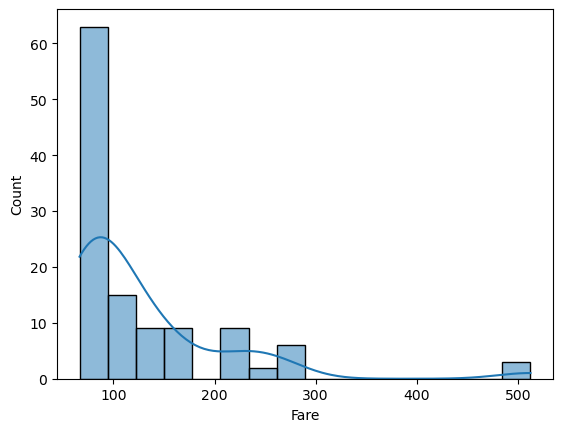

In [79]:
sns.histplot(outliers['Fare'], kde=True)

In [80]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Analyse de la relation entre les valeurs manquantes et la target

##### Taux de Survivant par rapport à 'Has_cabin'

In [82]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Cabin_letter,Has_cabin,Age_group,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,NaN,0,Adulte,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,C,1,Adulte,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,NaN,0,Adulte,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,C,1,Adulte,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,NaN,0,Adulte,"(7.91, 14.454]"


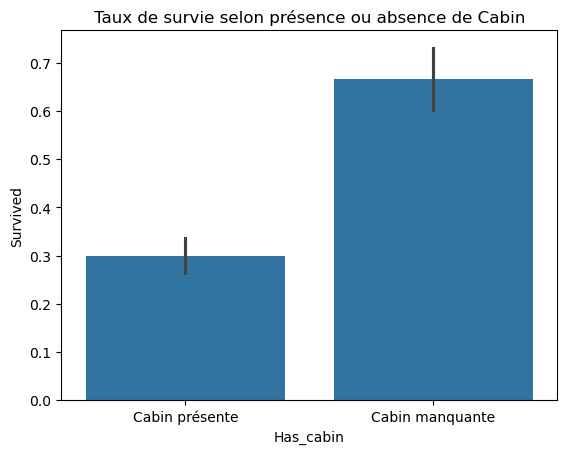

In [83]:
sns.barplot(x='Has_cabin', y='Survived', data=train_df)
plt.title("Taux de survie selon présence ou absence de Cabin")
plt.xticks([0, 1], ['Cabin présente', 'Cabin manquante'])
plt.show()

In [84]:
pd.crosstab(train_df['Cabin'].isna(), train_df['Sex'])

Sex,female,male
Cabin,,
False,97,107
True,217,470


ValueError: bottom cannot be >= top

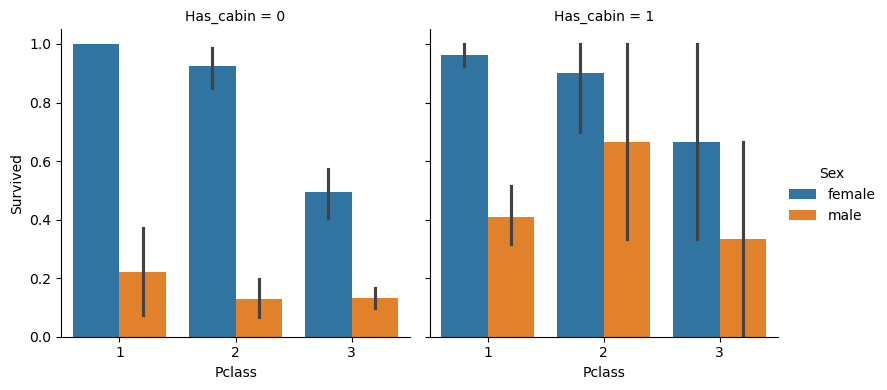

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Catplot avec 2 sous-graphiques (colonne = HasCabin)
sns.catplot(
    data=train_df,
    x='Pclass',
    y='Survived',
    hue='Sex',
    col='Has_cabin',
    kind='bar',
    height=4,
    aspect=1
)

plt.subplots_adjust(top=0.85)
plt.suptitle("Taux de survie par classe et sexe\n(selon présence d'information de cabine)", fontsize=14)
plt.show()
